# Generate results

results/
    generate_results/
        PBS/
            warehouse_1/
                throughput.npy (different number of agents)
                runtime.npy (different number of agents)
                throughput_plot.png
                runtime_plot.png
                logger.txt
        RANDOM/
            ... same as above
        QTRAN/

maps/
    warehouse_1/
        grid_map.npy
        heuristic.npy
        start_options.npy
        goal_options.npy
        start_locs_xN.npy # x: number of agents
        goal_locs_xN.npy
    random_1/
        ...

### Methods:
1. trained model
2. random PP
3. PBS

### Maps
1. Warehouse
2. random with varying obstacle density

## transfer to unseen maps

In [1]:
import numpy as np
import os.path
import yaml
import pickle

from utils import *
from Environment import Environment
from Model import QNetwork

# set np seed
np.random.seed(0)

import os
file_path = "config.yaml"

# Load the YAML config file
with open(file_path, "r") as file:
    config_file = yaml.safe_load(file)



algorithm = "random_PP"
grid_map = "warehouse_2"

# CONFIGS
config = config_file["generate_results"]
DIR = config["root"] + config["subroot"]
map_path = config["maps"][grid_map]
env_config = config["environment"]
dir_results = DIR + algorithm + "/" + grid_map + "/"
if not os.path.exists(dir_results):
    os.makedirs(dir_results)

# map
GRID_MAP_FILE = map_path + config["map_file"]
HEURISTIC_MAP_FILE = map_path + config["heur_file"]
START_OPTIONS = map_path + config["start_options"]
GOAL_OPTIONS = map_path + config["goal_options"]

log_path = dir_results + "log/"
if not os.path.exists(log_path):
    os.makedirs(log_path)

logger = Logger(log_path+"log.txt")

TIMEOUT = 60
TIMESTEP = 5000

window = 3

/localhome/esa95/anaconda3/envs/torch/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Create plots

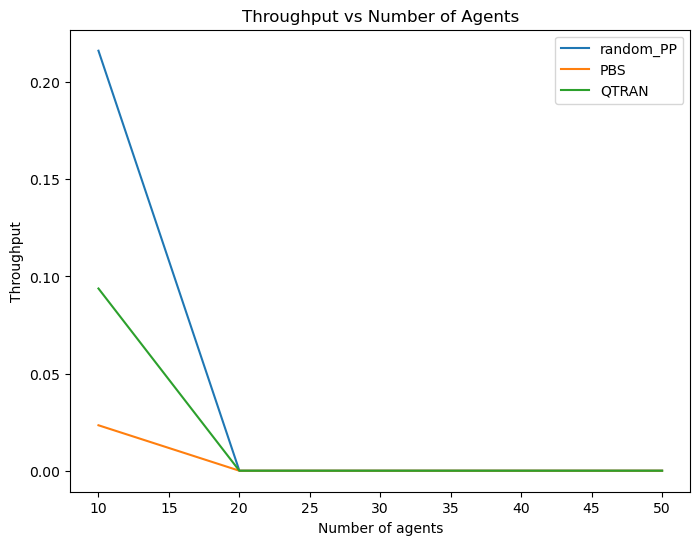

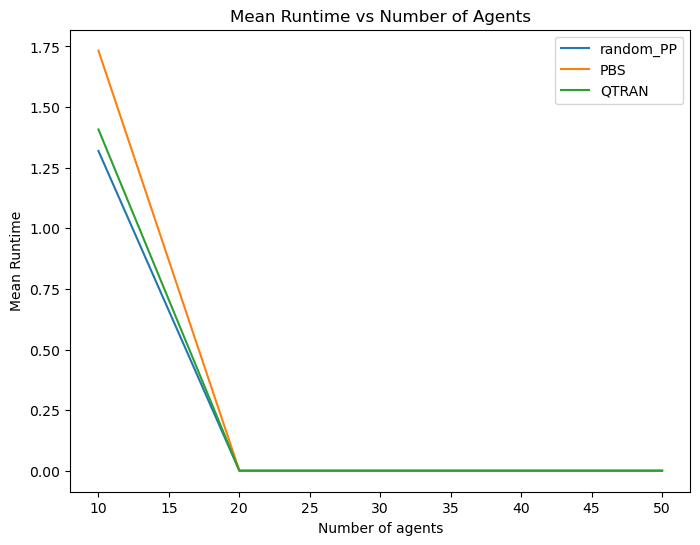

In [4]:
# num_of_agents = list(range(50, 101, 10))
num_of_agents = list(range(10, 51, 10))
grid_map = "random_60"

algorithms = ["random_PP", "PBS", "QTRAN"]

plt.figure(figsize=(8, 6))
for algorithm in algorithms:
    # Load results
    config = config_file["generate_results"]
    DIR = config["root"] + config["subroot"]
    dir_results = DIR + algorithm + "/" + grid_map + "/"
    with open(dir_results+"results.pkl", "rb") as f:
        results = pickle.load(f)

    throughput = []
    for n_agents in num_of_agents:
        if n_agents not in results or len(results[n_agents]['num_goals_reached']) != TIMESTEP:
            throughput.append(0)
        else:
            throughput.append(np.mean(results[n_agents]['num_goals_reached'])/window)

    plt.plot(num_of_agents, throughput, label=algorithm)


plt.xlabel('Number of agents')
plt.ylabel('Throughput')
plt.legend()
plt.title('Throughput vs Number of Agents')
plt.savefig(f'throughput_{grid_map}.png')
plt.show()

plt.figure(figsize=(8, 6))
for algorithm in algorithms:
    # Load results
    config = config_file["generate_results"]
    DIR = config["root"] + config["subroot"]
    dir_results = DIR + algorithm + "/" + grid_map + "/"
    with open(dir_results+"results.pkl", "rb") as f:
        results = pickle.load(f)

    runtime = []
    for n_agents in num_of_agents:
        if n_agents not in results or len(results[n_agents]['runtimes']) != TIMESTEP:
            runtime.append(0)
        else:
            runtime.append(np.mean(results[n_agents]['runtimes']))

    plt.plot(num_of_agents, runtime, label=algorithm)

plt.xlabel('Number of agents')
plt.ylabel('Mean Runtime')
plt.legend()
plt.title('Mean Runtime vs Number of Agents')
plt.savefig(f'mean_runtime_{grid_map}.png')
plt.show()

In [2]:
config = config_file["generate_results"]
DIR = config["root"] + config["subroot"]
dir_results = DIR + "random_PP" + "/" + grid_map + "/"
with open(dir_results+"results.pkl", "rb") as f:
    results = pickle.load(f)

len(results[60]['runtimes']), np.mean(results[60]['num_goals_reached'])/window

(5000, 1.9648)

In [30]:
# increase in percentage between QTRAN and random_PP of each number of agents
np.round((np.array(throughput_QTRAN) - np.array(throughput_random_PP)) / np.array(throughput_random_PP) * 100, 3)

array([5.553, 5.202,   nan,   nan,   nan,   nan])

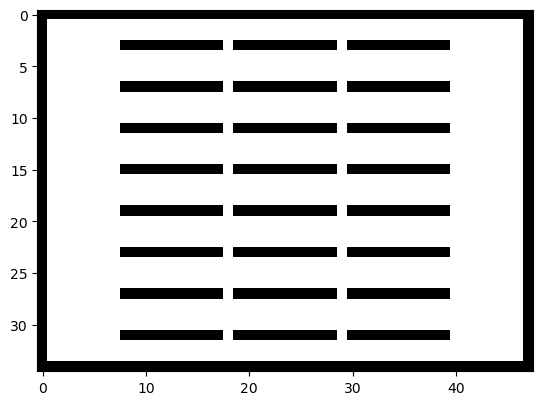

In [12]:
plt.imshow(np.load("maps/warehouse_2/grid_map.npy"), cmap='binary')